In [7]:
import numpy as np
import pandas as pd
from solution import MultinomialLogReg, OrdinalLogReg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [8]:
df = pd.read_csv("dataset.csv", delimiter=";")

print(set(df["ShotType"]))

{'layup', 'hook shot', 'dunk', 'tip-in', 'above head', 'other'}


In [9]:
X = df.loc[:, df.columns != 'ShotType']
y = df["ShotType"]
X = pd.get_dummies(X, columns = ['Competition', 'PlayerType', 'Movement'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

possible_outcomes = np.unique(y_train.to_numpy())

def normalize2(X_train, X_test, column):
    u = np.mean(X_train[column])
    std = np.std(X_train[column])
    X_train[column] = (X_train[column] - u) / std
    X_test[column] = (X_test[column] - u) / std
    return X_train, X_test
def normalize(X_train, column):
    u = np.mean(X_train[column])
    std = np.std(X_train[column])
    X_train[column] = (X_train[column] - u) / std
    return X_train

X = normalize(X, "Angle")
X = normalize(X, "Distance")
X_train, X_test = normalize2(X_train, X_test, "Angle")
X_train, X_test = normalize2(X_train, X_test, "Distance")

columns = X_train.columns

X = X.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [10]:
lr = MultinomialLogReg()
lr.build(X_train, y_train)
prob = lr.predict(X_test)
y_pred = [max(enumerate(p),key=lambda x: x[1])[0] for p in prob]

for i, possible_outcome in zip(range(len(possible_outcomes)), possible_outcomes):
    y_pred = [possible_outcome if j==i else j for j in y_pred]

print(accuracy_score(y_test, y_pred))

[[  0.76082625   5.44504663  -0.27607026  -9.70508211  -0.72487913
    0.21059011  -5.97414606  -1.54486846  -0.29277919  -0.01990316
    7.24060663  -1.52769186 -15.50080729]
 [ -0.18255959  -7.0927245   -0.10674073  -2.3446942   -0.97842781
    0.4419048    7.1189683    0.61886003   0.82417301   1.38977961
    1.93133023  -2.72265554   6.29058492]
 [  1.08417273   5.14699654  -0.04490285  -7.55806162  -0.11601737
    0.22169202  -4.35978649  -0.30274683  -0.05254049   0.50963617
    2.24995808 -13.23240646  -1.79126191]
 [  0.31708124  -7.33703412  -0.60405814  -5.36537591  -1.10669572
   -0.3262999   -6.24401613  -2.2011255   -0.25114039  -0.13899712
   -5.24430323  12.7437338  -12.19469004]
 [  0.62403836   6.63465883  -0.26581136  -9.39515655  -0.73924975
    0.47211129  -6.99184654  -2.16873144  -0.59678272  -0.52748255
   -5.64640235  -0.4362253  -14.61015045]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
  

In [13]:
df_B = pd.DataFrame(np.concatenate((lr.B, [[p] for p in possible_outcomes]), axis = 1), columns = np.concatenate((columns, ["B_0", "possible_outcomes"])))
df_B = df_B.set_index("possible_outcomes")
df_B.to_csv("rez.csv")
df_B

,Transition,TwoLegged,Angle,Distance,Competition_NBA,Competition_SLO1,Competition_U14,Competition_U16,PlayerType_F,PlayerType_G,Movement_drive,Movement_no,B_0
possible_outcomes,,,,,,,,,,,,,
above head,0.7608262496211786,5.4450466329059894,-0.27607026056749495,-9.705082106565182,-0.7248791301096413,0.2105901081524501,-5.974146056330027,-1.5448684636803753,-0.2927791858846657,-0.019903158122737696,7.2406066301848515,-1.5276918637323327,-15.500807293392025
dunk,-0.18255958916348386,-7.092724496023181,-0.10674073362699807,-2.3446942042537415,-0.9784278075707877,0.4419048016865232,7.118968296809013,0.6188600308982702,0.824173008496445,1.3897796072288922,1.9313302297500083,-2.722655541323114,6.290584918433682
hook shot,1.0841727293534102,5.1469965371290325,-0.04490284632360209,-7.558061619955757,-0.11601736878228551,0.22169202449747277,-4.359786485691595,-0.30274683492445836,-0.05254049034957463,0.509636168419769,2.249958084545919,-13.232406457482845,-1.791261909464231
layup,0.31708124484341105,-7.33703411937661,-0.604058139274722,-5.3653759122516975,-1.1066957156481847,-0.32629990407283893,-6.244016130411752,-2.201125499191533,-0.2511403897100649,-0.13899711918110533,-5.2443032280513195,12.743733801140174,-12.194690042730914
other,0.6240383555892957,6.63465883474566,-0.2658113619747442,-9.395156552264613,-0.7392497503746649,0.47211128895826876,-6.991846535987355,-2.168731444191241,-0.5967827190234974,-0.5274825468464028,-5.646402351047061,-0.43622530435619655,-14.610150446091044
tip-in,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


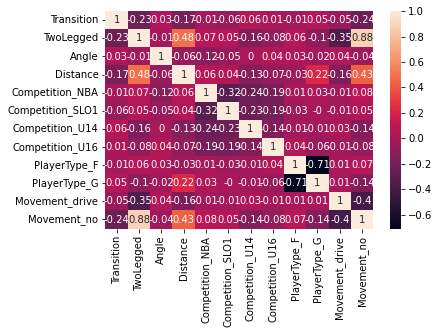

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = pd.DataFrame(X, columns = columns).corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()